<a href="https://colab.research.google.com/github/Yfyangd/BMIR/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning in medical image analysis_homework_5
s108003817 楊元福

## Import Library & DataSet

In [6]:
# Import Tensorflow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Import Fashion_MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


## 1. Fully connected network with two optimizers of SGD and Nadam

In [0]:
model_FCN = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### 1.1 Training with SGD

In [37]:
model_FCN.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_SGD = model_FCN.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8125 - accuracy: 0.7415 - val_loss: 0.6046 - val_accuracy: 0.7921
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5444 - accuracy: 0.8173 - val_loss: 0.5324 - val_accuracy: 0.8141
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4929 - accuracy: 0.8316 - val_loss: 0.4889 - val_accuracy: 0.8307
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4643 - accuracy: 0.8401 - val_loss: 0.4700 - val_accuracy: 0.8389
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4467 - accuracy: 0.8464 - val_loss: 0.4564 - val_accuracy: 0.8402
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4307 - accuracy: 0.8520 - val_loss: 0.4445 - val_accuracy: 0.8431
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4201 - accuracy: 0.8559 - val_loss: 0.4684 - val_accuracy:

In [38]:
test_loss_FCN_SGD, test_acc_FCN_SGD = model_FCN.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.4060 - accuracy: 0.8585


### 1.2 Training with Nadam

In [39]:
model_FCN.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Nadam = model_FCN.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3879 - accuracy: 0.8636 - val_loss: 0.4325 - val_accuracy: 0.8495
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3443 - accuracy: 0.8769 - val_loss: 0.3794 - val_accuracy: 0.8699
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3167 - accuracy: 0.8849 - val_loss: 0.3654 - val_accuracy: 0.8674
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2988 - accuracy: 0.8919 - val_loss: 0.3605 - val_accuracy: 0.8711
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2832 - accuracy: 0.8963 - val_loss: 0.3547 - val_accuracy: 0.8731
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2678 - accuracy: 0.8997 - val_loss: 0.3385 - val_accuracy: 0.8791
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2579 - accuracy: 0.9043 - val_loss: 0.3596 - val_accuracy:

In [40]:
test_loss_FCN_Nadam, test_acc_FCN_Nadam = model_FCN.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.3844 - accuracy: 0.8798


### 1.3 Performance Compare with SGD & Nadam

In [49]:
print('\nTest accuracy of SGD:', test_acc_FCN_SGD)
print('\nTest accuracy of Nadam:', test_acc_FCN_Nadam)


Test accuracy of SGD: 0.8585000038146973

Test accuracy of Nadam: 0.879800021648407


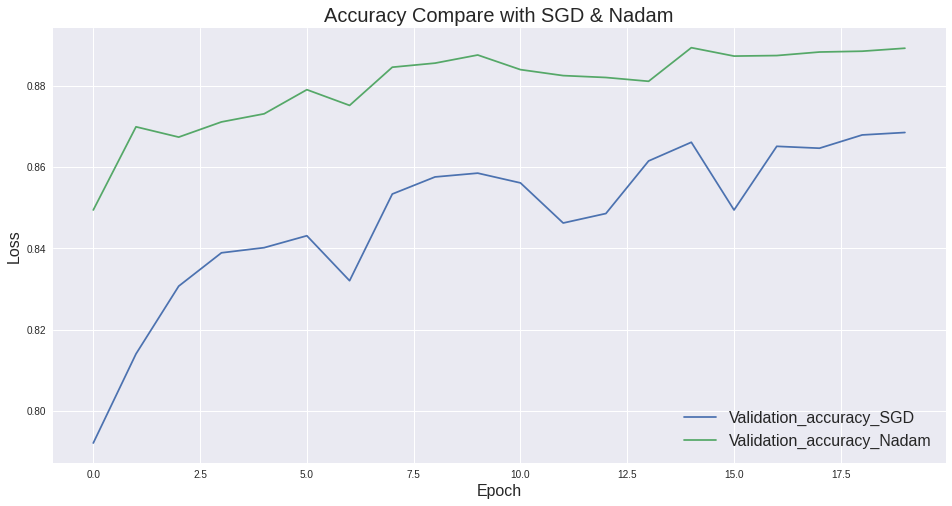

In [67]:
plt.style.use('seaborn')
plt.figure(figsize = (16,8))
plt.plot(history_SGD.history['val_accuracy'])
plt.plot(history_Nadam.history['val_accuracy'])
plt.title('Accuracy Compare with SGD & Nadam',fontsize=20)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['Validation_accuracy_SGD','Validation_accuracy_Nadam'], loc='lower right',fontsize=16)
plt.show()

## 結論: Fully connection network training with SGD & Nadam
由上圖得知在訓練Fully connection newwork, 採用Nesterov Accelerated Gradient(Nadam) 比起 Stochastic Gradient Descent(SGD), 在收斂方面更具有優勢:
* Nadam 在一開始時的準確度就比SGD來的高 (0.89 vs 0.87), 
* 在經過20 Epoch訓練之後, Nadam的準確度也比SGD來的高 (0.35 vs 0.37)
* 最終的測試準確度, Nadam也比SGD來的高 (**0.8798** vs **0.8585**)

## 2. CNN with two optimizers of SGD and Nadam
I used **LeNet** as my test CNN model.

In [0]:
model_CNN = keras.Sequential()
model_CNN.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_CNN.add(layers.AveragePooling2D())
model_CNN.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_CNN.add(layers.AveragePooling2D())
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(units=128, activation='relu'))
model_CNN.add(layers.Dense(units=64, activation='relu'))
model_CNN.add(layers.Dense(units=10, activation = 'softmax'))

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
train_labels = train_labels.reshape(train_labels.shape[0], 1)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

### 2.1 Training with SGD

In [53]:
model_CNN.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_SGD_CNN = model_CNN.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 5s 4ms/step - loss: 2.2970 - accuracy: 0.2149 - val_loss: 2.2849 - val_accuracy: 0.2135
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 2.0515 - accuracy: 0.4438 - val_loss: 1.8271 - val_accuracy: 0.6528
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7928 - accuracy: 0.6806 - val_loss: 1.7542 - val_accuracy: 0.7193
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7455 - accuracy: 0.7255 - val_loss: 1.7372 - val_accuracy: 0.7287
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7308 - accuracy: 0.7361 - val_loss: 1.7222 - val_accuracy: 0.7425
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7221 - accuracy: 0.7428 - val_loss: 1.7054 - val_accuracy: 0.7572
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7132 - accuracy: 0.7520 - val_loss: 1.6996 - val_accuracy:

In [54]:
test_loss_CNN_SGD, test_acc_CNN_SGD = model_CNN.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.6703 - accuracy: 0.7929


### 2.2 Training with Nadam

In [55]:
model_CNN.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_Nadam_CNN = model_CNN.fit(train_images, train_labels, epochs=20, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6745 - accuracy: 0.7870 - val_loss: 1.6511 - val_accuracy: 0.8096
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6489 - accuracy: 0.8124 - val_loss: 1.6455 - val_accuracy: 0.8165
Epoch 3/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6335 - accuracy: 0.8281 - val_loss: 1.6474 - val_accuracy: 0.8148
Epoch 4/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.6222 - accuracy: 0.8398 - val_loss: 1.6334 - val_accuracy: 0.8287
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6108 - accuracy: 0.8505 - val_loss: 1.6133 - val_accuracy: 0.8483
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6026 - accuracy: 0.8591 - val_loss: 1.6140 - val_accuracy: 0.8471
Epoch 7/20
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5996 - accuracy: 0.8615 - val_loss: 1.5993 - val_accuracy:

In [56]:
test_loss_CNN_Nadam, test_acc_CNN_Nadam = model_CNN.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.5981 - accuracy: 0.8627


### 2.3 Performance Compare with SGD & Nadam

In [57]:
print('\nTest accuracy of SGD:', test_acc_CNN_SGD)
print('\nTest accuracy of Nadam:', test_acc_CNN_Nadam)


Test accuracy of SGD: 0.792900025844574

Test accuracy of Nadam: 0.8626999855041504


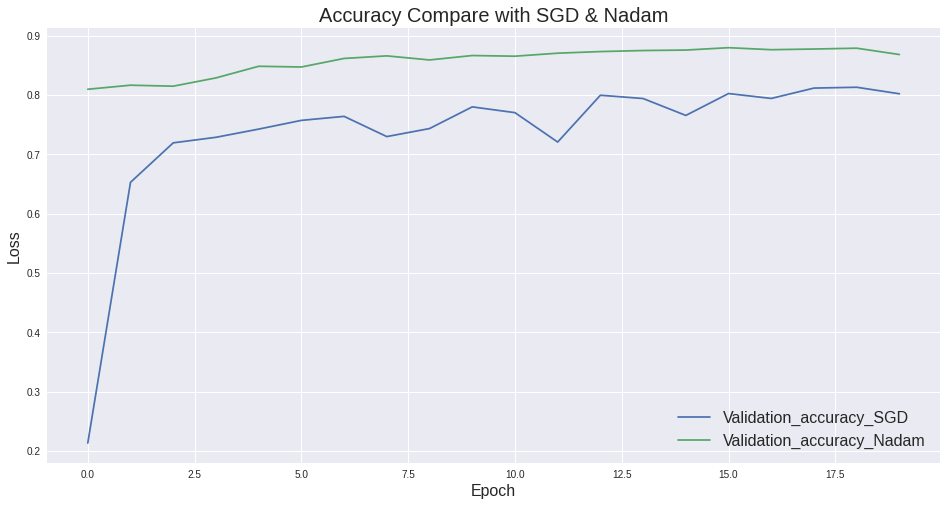

In [68]:
plt.style.use('seaborn')
plt.figure(figsize = (16,8))
plt.plot(history_SGD_CNN.history['val_accuracy'])
plt.plot(history_Nadam_CNN.history['val_accuracy'])
plt.title('Accuracy Compare with SGD & Nadam',fontsize=20)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['Validation_accuracy_SGD','Validation_accuracy_Nadam'], loc='lower right',fontsize=16)
plt.show()

## 結論: CNN training with SGD & Nadam
由上圖得知在訓練Convolution Neural Network, 採用Nesterov Accelerated Gradient(Nadam) 比起 Stochastic Gradient Descent(SGD), 在收斂方面更具有優勢:
* Nadam 在一開始時的準確度就比SGD來的高 (0.81 vs 0.21), 
* 在經過20 Epoch訓練之後, Nadam的準確度也比SGD來的高 (0.87 vs 0.80)
* 最終的測試準確度, Nadam也比SGD來的高 (**0.8627** vs **0.7929**)